## **Το Πρόβλημα του Πλανόδιου Πωλητή**

### **1. Περιγραφή του Προβλήματος**
Ο **Πλανόδιος Πωλητής** αντιμετωπίζει ένα κλασικό πρόβλημα βελτιστοποίησης:
- Έχει έναν περιορισμένο **αποθηκευτικό χώρο** (π.χ. μια τσάντα, ένα καρότσι).
- Διαθέτει **διάφορα προϊόντα**, καθένα με **βάρος** και **τιμή πώλησης**.
- Θέλει να **επιλέξει ποια προϊόντα να μεταφέρει**, ώστε να **μεγιστοποιήσει το συνολικό του κέρδος** χωρίς να ξεπεράσει το όριο χωρητικότητας.

Το πρόβλημα αυτό είναι μια **παραλλαγή του προβλήματος του Σακιδίου (Knapsack Problem)**, όπου κάθε αντικείμενο μπορεί είτε να **επιλεγεί πλήρως (0/1)** είτε να **επιλεγεί μερικώς (Fractional Knapsack)**.

---

### **2. Αλγοριθμικές Προσεγγίσεις**
Υπάρχουν δύο βασικοί τρόποι επίλυσης:

#### **Α. (Greedy Algorithm)**
- Ο πωλητής **διαλέγει τα προϊόντα με βάση μια στρατηγική**, όπως η **μεγαλύτερη αξία ανά μονάδα βάρους (value-to-weight ratio)**.
- **Ταξινομεί τα αντικείμενα** κατά αυτή τη σειρά και επιλέγει τα πιο προσοδοφόρα.
- **Χρόνος εκτέλεσης:** $O(n \log n)$, λόγω της ταξινόμησης.
- **Πρόβλημα:** Δε δίνει πάντα τη **βέλτιστη λύση**.

#### **Β. Δυναμικός Προγραμματισμός (Dynamic Programming - DP)**
- Δημιουργούμε έναν **πίνακα $dp[i][w]$**, όπου:  
  - $i$ = Πλήθος αντικειμένων που εξετάζουμε  
  - $w$ = Μέγιστη χωρητικότητα διαθέσιμου χώρου  
- **Γεμίζουμε τον πίνακα** επαναληπτικά, επιλέγοντας **την καλύτερη δυνατή λύση για κάθε συνδυασμό προϊόντων και διαθέσιμου χώρου**.
- **Εγγυάται τη βέλτιστη λύση**, αλλά έχει μεγαλύτερη πολυπλοκότητα: $O(nW)$.

---

### **3. Οπτικοποίηση και Ανάλυση**
- **Εφαρμόζουμε και συγκρίνουμε** τις δύο μεθόδους.
- **Οπτικοποιούμε** τις επιλογές του δυναμικού προγραμματισμού μέσω ενός **πίνακα DP**.
- **Δείχνουμε γραφήματα** για την τελική αξία κέρδους που επιτυγχάνει κάθε αλγόριθμος.

---

### **4. Σύγκριση των Μεθόδων**
| Μέθοδος            | Χρόνος Εκτέλεσης | Αποδοτικότητα | Βέλτιστη Λύση |
|--------------------|----------------|--------------|--------------|
| **Greedy**        | $O(n \log n)$ | Γρήγορη αλλά προσεγγιστική | Όχι πάντα |
| **Dynamic Programming** | $O(nW)$ | Ακριβής αλλά αργή | Ναι |

---

### **5. Εφαρμογές στην Πραγματική Ζωή**
Το πρόβλημα αυτό έχει **πραγματικές εφαρμογές** σε:
- **Διαχείριση αποθήκης & logistics** (βέλτιστη χρήση χώρου αποθήκευσης).
- **Προγραμματισμός επενδύσεων** (επιλογή έργων με βάση κόστος και απόδοση).
- **Συστήματα συστάσεων** (επιλογή προϊόντων με βάση προτίμηση και περιορισμούς κόστους).






The Street Vendor Problem is a variation of the Knapsack Problem. A vendor must choose items to carry, optimizing for maximum profit within a given weight capacity.



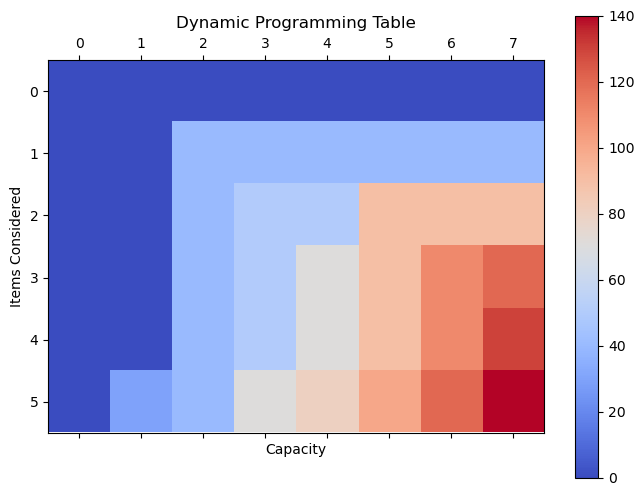

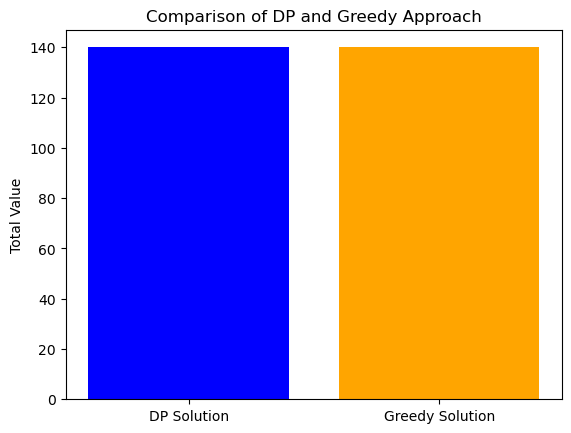

Dynamic Programming Selected Items: [(1, 30), (4, 70), (2, 40)]
Greedy Algorithm Selected Items: [(1, 30), (2, 40), (4, 70)]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Theoretical Background
print("\nThe Street Vendor Problem is a variation of the Knapsack Problem. A vendor must choose items to carry, optimizing for maximum profit within a given weight capacity.\n")

# Street Vendor Problem - Dynamic Programming Approach
def street_vendor_dp(items, capacity):
    n = len(items)
    dp = np.zeros((n + 1, capacity + 1))
    
    for i in range(1, n + 1):
        weight, value = items[i - 1]
        for w in range(capacity + 1):
            if weight <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weight] + value)
            else:
                dp[i][w] = dp[i - 1][w]
    
    return dp

# Retrieve selected items
def get_selected_items(dp, items, capacity):
    selected_items = []
    i, w = len(items), capacity
    while i > 0 and w > 0:
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(items[i - 1])
            w -= items[i - 1][0]
        i -= 1
    return selected_items

# Greedy Approach
def street_vendor_greedy(items, capacity):
    items = sorted(items, key=lambda x: x[1]/x[0], reverse=True)
    total_value = 0
    selected_items = []
    
    for weight, value in items:
        if weight <= capacity:
            selected_items.append((weight, value))
            total_value += value
            capacity -= weight
    
    return total_value, selected_items

# Example Data
items = [(2, 40), (3, 50), (4, 70), (5, 90), (1, 30)]  # (weight, value)
capacity = 7

dp_table = street_vendor_dp(items, capacity)
selected_items_dp = get_selected_items(dp_table, items, capacity)

total_value_greedy, selected_items_greedy = street_vendor_greedy(items, capacity)

# Plot DP Table
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(dp_table, cmap='coolwarm')
plt.colorbar(cax)
ax.set_xlabel('Capacity')
ax.set_ylabel('Items Considered')
ax.set_title('Dynamic Programming Table')
plt.show()

# Plot results
fig, ax = plt.subplots()
labels = ['DP Solution', 'Greedy Solution']
values = [dp_table[len(items)][capacity], total_value_greedy]
ax.bar(labels, values, color=['blue', 'orange'])
ax.set_ylabel('Total Value')
ax.set_title('Comparison of DP and Greedy Approach')
plt.show()

# Print Results
print("Dynamic Programming Selected Items:", selected_items_dp)
print("Greedy Algorithm Selected Items:", selected_items_greedy)


C:\Users\ksait\AppData\Local\Temp\ipykernel_17908\2890264486.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=ratios, palette='coolwarm')


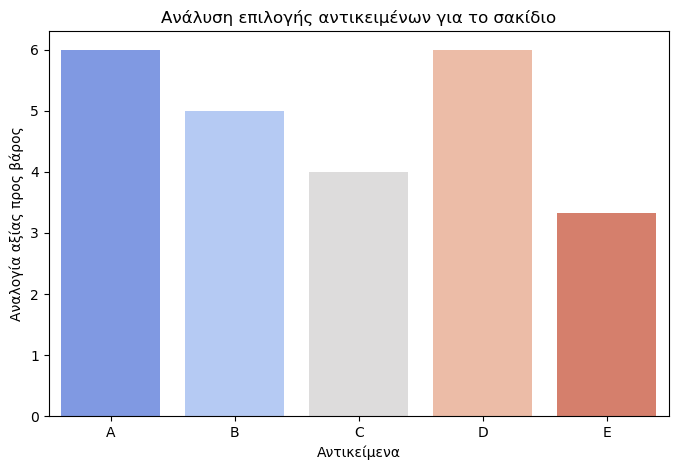

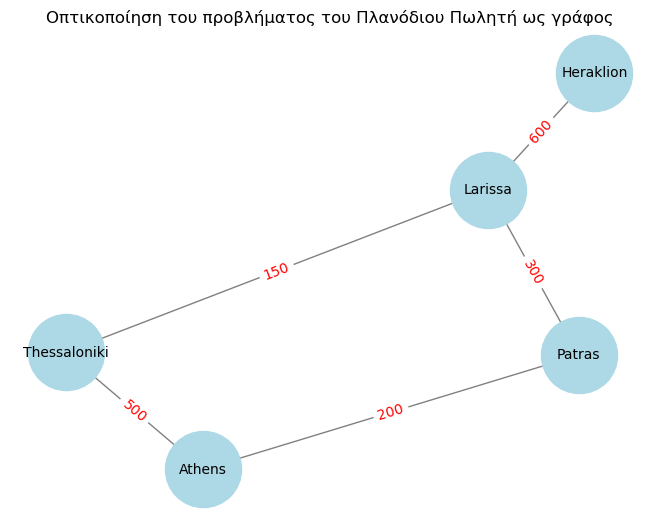

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Παράδειγμα δεδομένων
items = ['A', 'B', 'C', 'D', 'E']
values = [60, 100, 120, 30, 50]
weights = [10, 20, 30, 5, 15]
capacity = 50

# Υπολογισμός της αναλογίας αξίας προς βάρος
ratios = [v/w for v, w in zip(values, weights)]

# Bar plot των αντικειμένων με βάση την αναλογία τους
plt.figure(figsize=(8, 5))
sns.barplot(x=items, y=ratios, palette='coolwarm')
plt.xlabel("Αντικείμενα")
plt.ylabel("Αναλογία αξίας προς βάρος")
plt.title("Ανάλυση επιλογής αντικειμένων για το σακίδιο")
plt.show()

# Οπτικοποίηση ως γράφος
G = nx.Graph()
cities = ['Athens', 'Thessaloniki', 'Patras', 'Larissa', 'Heraklion']
edges = [('Athens', 'Thessaloniki', 500), ('Athens', 'Patras', 200), ('Patras', 'Larissa', 300), ('Larissa', 'Heraklion', 600), ('Thessaloniki', 'Larissa', 150)]

for city in cities:
    G.add_node(city)
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Οπτικοποίηση του προβλήματος του Πλανόδιου Πωλητή ως γράφος")
plt.show()

## **Άσκηση: Εφαρμογή και Σύγκριση Αλγορίθμων**

### ** Στόχος**
Οι φοιτητές θα υλοποιήσουν δύο διαφορετικές μεθόδους για την επίλυση του προβλήματος του Πλανόδιου Πωλητή χρησιμοποιώντας γράφους και θα συγκρίνουν την αποτελεσματικότητά τους.

### ** Οδηγίες**
1. **Αναπαραστήστε το πρόβλημα ως γράφο χρησιμοποιώντας `networkx`**:
   - Οι κόμβοι θα είναι οι πόλεις.
   - Οι ακμές θα έχουν βάρη που αναπαριστούν τις αποστάσεις μεταξύ των πόλεων.

2. **Υλοποιήστε και συγκρίνετε δύο προσεγγίσεις**:
   - **Απληστία (Nearest Neighbor Heuristic)**: Επιλέγει κάθε φορά την πλησιέστερη επόμενη πόλη.
   - **Δυναμικός Προγραμματισμός (Held-Karp Algorithm)**: Εγγυάται τη βέλτιστη λύση αλλά είναι πιο αργός.

3. **Οπτικοποιήστε τα αποτελέσματα με διαγράμματα**:
   - Σχεδιάστε τον γράφο με τις διαδρομές των δύο μεθόδων.
   - Συγκρίνετε το συνολικό κόστος διαδρομής σε ένα διάγραμμα bar plot.

4. **Σχολιάστε τα αποτελέσματα**:
   - Ποιος αλγόριθμος έδωσε την καλύτερη λύση;
   - Ποια είναι η πολυπλοκότητα κάθε αλγορίθμου;
   - Πώς επηρεάζεται η απόδοση καθώς αυξάνεται ο αριθμός των πόλεων;

### **Επιπλέον Πρόκληση**
Μπορείτε να δοκιμάσετε τον **αλγόριθμο Simulated Annealing** ή **Genetic Algorithm** για την εύρεση μιας προσεγγιστικής λύσης.